# Context

We're going to work on the database of Open Food Facts that you can find here: https://world.openfoodfacts.org/

Open Food Facts is a non-profit project developed by thousands of volunteers from around the world made by everyone, for everyone.

The goal of this notebook is to have a better understanding of the data, clean our dataframe and propose an application based on our observations and exploratory manipulations.

# Notebook preparation

The current notebook has been written on Kaggle due to our low machine performance on Jupyter or Google Collab, explained by the file size which is over 4 Gb. Some of the basic operations such as reading the dataframe were taking a lot of time and was slowing us down in the process. 

We're starting by defining the various librairies that we're going to use in the notebook such as **pandas** to work on the dataframes, **numpy** for linear algebra operations, **matplotlib** for graphics on the missing values and univariable analysis 

Note that we've imported the **warnings librairy** in oder to ignore the warning message about the file size (currently over 4 GB) when reading the file.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore") # ignore the warnings about file size
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/openfoodfacts/set_of_data.csv
/kaggle/input/openfoodfacts/en.openfoodfacts.org.products.csv


# Observations

We're starting by importing the file and put it into a dataframe using pandas library with the pd.read_csv() operation. 

**Note:**
* We're using **sep** to split the data by tabulation 
* **error_bad_lines** will drop the rows that are invalid (due to csv written mistakes in the file)
* The argument **low_memory** is used for better allocation of the RAM


We're then creating a new dataframe that is going to include a random 10% of the initial dataframe we previously imported that we call *sample10*.
To do so, we've used .sample() operation from pandas library using frac=0.1 argument to get 10% of the initial *raw_data*.

Next, to have an idea of the columns and rows we're treating here, we display the five first rows of the dataframe we just created using .head() operation.  


In [2]:
# import des données
raw_data = (pd.read_csv('../input/openfoodfacts/en.openfoodfacts.org.products.csv',sep='\t', error_bad_lines=False, low_memory=False))
sample10 = raw_data.sample(frac=0.1) 
# création d'un sample de 10% du dataset pour alléger la mémoire du notebook lors du nettoyage
sample10.head() # 5 premières colonnes et header

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
737188,3080216051703,http://world-en.openfoodfacts.org/product/3080...,belaid,1624120281,2021-06-19T16:31:21Z,1624120977,2021-06-19T16:42:57Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
687988,2689189015227,http://world-en.openfoodfacts.org/product/2689...,kiliweb,1563810305,2019-07-22T15:45:05Z,1630579595,2021-09-02T10:46:35Z,2 côtes premières de porc,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002675,9310645290010,http://world-en.openfoodfacts.org/product/9310...,kiliweb,1623469883,2021-06-12T03:51:23Z,1623469884,2021-06-12T03:51:24Z,Mini white sourdough,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1157241,4002330000411,http://world-en.openfoodfacts.org/product/4002...,prepperapp,1584217270,2020-03-14T20:21:10Z,1586162701,2020-04-06T08:45:01Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
305505,0202402056221,http://world-en.openfoodfacts.org/product/0202...,kiliweb,1535736472,2018-08-31T17:27:52Z,1545992719,2018-12-28T10:25:19Z,La brandade de morue parmentière,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
sample10.describe()

,created_t,last_modified_t,cities,allergens_en,serving_quantity,no_nutriments,additives_n,additives,ingredients_from_palm_oil_n,ingredients_from_palm_oil,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
count,2.024860e+05,2.024860e+05,0.0,0.0,5.014600e+04,0.0,72763.000000,0.0,72763.000000,0.0,...,1154.000000,72641.000000,0.0,0.0,0.0,8.000000,176.000000,5.000000,9.000000,5.000000
mean,1.561472e+09,1.596467e+09,NaN,NaN,3.921363e+02,NaN,2.031609,NaN,0.020876,NaN,...,1140.375371,9.146543,NaN,NaN,NaN,0.083675,0.000142,3.980000,0.030919,0.015600
std,5.329669e+07,3.148998e+07,NaN,NaN,6.045794e+04,NaN,2.921311,NaN,0.144975,NaN,...,19319.971719,8.869431,NaN,NaN,NaN,0.058378,0.000513,0.884308,0.028324,0.009908
min,1.332021e+09,1.346277e+09,NaN,NaN,0.000000e+00,NaN,0.000000,NaN,0.000000,NaN,...,1.470000,-15.000000,NaN,NaN,NaN,0.011100,0.000000,2.700000,0.001350,0.006500
25%,1.524923e+09,1.582931e+09,NaN,NaN,2.800000e+01,NaN,0.000000,NaN,0.000000,NaN,...,108.530000,1.000000,NaN,NaN,NaN,0.053325,0.000008,4.000000,0.010000,0.006500
50%,1.572261e+09,1.600764e+09,NaN,NaN,5.400000e+01,NaN,1.000000,NaN,0.000000,NaN,...,324.135000,10.000000,NaN,NaN,NaN,0.069000,0.000023,4.000000,0.024000,0.015000
75%,1.605589e+09,1.620465e+09,NaN,NaN,1.140000e+02,NaN,3.000000,NaN,0.000000,NaN,...,630.500000,16.000000,NaN,NaN,NaN,0.126750,0.000101,4.000000,0.051000,0.020000
max,1.636507e+09,1.636508e+09,NaN,NaN,1.349738e+07,NaN,33.000000,NaN,2.000000,NaN,...,656298.600000,40.000000,NaN,NaN,NaN,0.164000,0.006300,5.200000,0.080000,0.030000


In order to have a better idea of the quality of the data we're treating, we calculate the number of columns, rows, cells, missing values and percentage of missing values out of our dataframe.

To do so, we use basics arithmetics operations on our dataframe using pandas library such as:
* len() that is returning the size of the data
* .isna().sum().sum() returns the total missing valeus of the dataframe
* .format() that allows us to return a certain number of digit for the % of missing values

We can already notice that we have an overall **80% of missing values** that we will have to deal with.

In [4]:
print('number of columns:',len(sample10.columns)) # return the number of columns 
print('number of rows:',len(sample10)) # return the number of rows
print('number of cells:',len(sample10)*len(sample10.columns))# return the number of data 
print('number of missing values:',sample10.isna().sum().sum()) # return the number of total missing values
print('number of missing values in % : {:.2%}'.format((sample10.isna().sum().sum())/(len(sample10)*len(sample10.columns)))) # return the percentage of missing values




number of columns: 187
number of rows: 202486
number of cells: 37864882
number of missing values: 30313694
number of missing values in % : 80.06%


Now we want to dive in deeper in the understanding of the missing values. 
Therefore, we're creating a loop that is going to display for each column, the label, the dtype of the variables and the number of missing values.

To do so, we've used:
* .columns() operation that returns the labels of the columns
* .dtypes argument that is returning the type of the variables 
* isna() operation is returning a boolean of the missing value (either True or False) that we combine with .sum() operation to have to total number of each missing value (NaN) for each columns

In [5]:
for i in sample10.columns:
    print(i,'||',sample10[i].dtypes,'||', sample10[i].isna().sum(),'||','{:.2%}'.format((sample10.isna().sum()/len(sample10))[i])) 


code || object || 0 || 0.00%
url || object || 0 || 0.00%
creator || object || 0 || 0.00%
created_t || int64 || 0 || 0.00%
created_datetime || object || 0 || 0.00%
last_modified_t || int64 || 0 || 0.00%
last_modified_datetime || object || 0 || 0.00%
product_name || object || 8151 || 4.03%
abbreviated_product_name || object || 201797 || 99.66%
generic_name || object || 190417 || 94.04%
quantity || object || 151735 || 74.94%
packaging || object || 171279 || 84.59%
packaging_tags || object || 171282 || 84.59%
packaging_text || object || 201765 || 99.64%
brands || object || 98637 || 48.71%
brands_tags || object || 98644 || 48.72%
categories || object || 108808 || 53.74%
categories_tags || object || 108809 || 53.74%
categories_en || object || 108809 || 53.74%
origins || object || 193972 || 95.80%
origins_tags || object || 193990 || 95.80%
origins_en || object || 193990 || 95.80%
manufacturing_places || object || 189906 || 93.79%
manufacturing_places_tags || object || 189913 || 93.79%
labels 

Now, we want to insert the values above in a new dataframe so it will be easier for us to manipulate the data and use it for data visualization. 

In order to do so, we're using:
* .DataFrame() to create an empty dataframe in which we're going to add the columns we're interested in such as Product name, Data type, Missing values count, % Missing values



In [6]:
missing_data = pd.DataFrame()
missing_data['Column variable'] = sample10.columns
missing_data['Data type'] = list(sample10.dtypes)
missing_data['Missing values count'] = list(sample10.isna().sum())
missing_data['% Missing values'] = list((sample10.isna().sum()/len(sample10))) 
print(missing_data)

        Column variable Data type  Missing values count  % Missing values
0                  code    object                     0          0.000000
1                   url    object                     0          0.000000
2               creator    object                     0          0.000000
3             created_t     int64                     0          0.000000
4      created_datetime    object                     0          0.000000
..                  ...       ...                   ...               ...
182        choline_100g   float64                202478          0.999960
183  phylloquinone_100g   float64                202310          0.999131
184    beta-glucan_100g   float64                202481          0.999975
185       inositol_100g   float64                202477          0.999956
186      carnitine_100g   float64                202481          0.999975

[187 rows x 4 columns]


# Data Visualization for Missing Values

We're using the **matplotlib** library to display our graph of missing values.

In order to do so, we:
* Sort our Missing values using .sort_values() operation on our *missing_data* dataframe
* Display a figure using .figure()
* Give a comprehensive label to our axis and title

In the following graph, the **x axis** represents our Column variable axis and the **y axis** represents the % Missing values axis.
We've used various operations found in **matplotlib** library to design our graph.


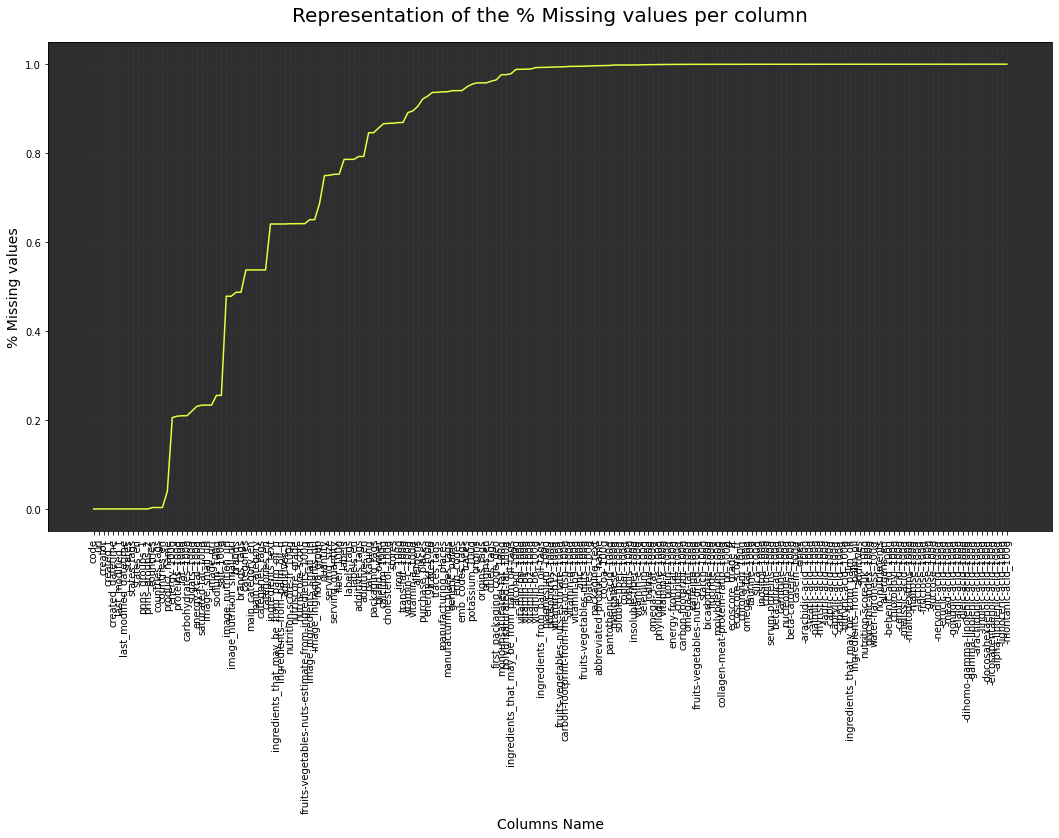

In [7]:
# data visualization for missing values of our dataframe called missing_data

to_plot = missing_data.sort_values(by=['% Missing values'])
fig, ax = plt.subplots(figsize=(18, 9))
ax.set_facecolor("#2E2E2E")
plt.title('Representation of the % Missing values per column', fontsize=20, y=1.03)
plt.xlabel('Columns Name', fontsize=14)
plt.ylabel('% Missing values', fontsize=14)
plt.grid(True, color="#93a1a1", alpha=0.05)
plt.xticks(rotation=90) # this line allow us to rotate the x_labels so they can be readable
plt.plot(to_plot['Column variable'],to_plot['% Missing values'],color="#E8FF41"); 


# Decisions for Treating with Missing Values

It seems obvious that we don't need to work with columns that have 100% missing values.
It seems also smart to drop the columns that have missing values above a certain threshhold. 
In the meantime, we have to keep enough data so our conclusions will be correct when applied on the entire dataset.
We decide to keep all the columns that have up to 40% missing values and drop the columns above, which means that the columns that we're going to deal with, will have at least 60% of the values filled in the columns.

To do so, we use:
* .dropna() in pandas library using the arguments **axis** to work on the columns and **thresh** to drop the columns that have more than 40% of missing values



In [8]:
data = sample10.dropna(axis=1, thresh= len(sample10)*0.6) 

# axis = 1 will drop columns with missing values, if 0, then it drops the rows by default
# thresh = 121491 and will drop all the columns that have N = 121491 missing values or above

for i in data.columns:
    print(i,'||',data[i].dtypes,'||', data[i].isna().sum(),'||','{:.2%}'.format((sample10.isna().sum()/len(sample10))[i])) 
    
# Let's have a look at our new dataframe below


code || object || 0 || 0.00%
url || object || 0 || 0.00%
creator || object || 0 || 0.00%
created_t || int64 || 0 || 0.00%
created_datetime || object || 0 || 0.00%
last_modified_t || int64 || 0 || 0.00%
last_modified_datetime || object || 0 || 0.00%
product_name || object || 8151 || 4.03%
countries || object || 651 || 0.32%
countries_tags || object || 652 || 0.32%
countries_en || object || 652 || 0.32%
pnns_groups_1 || object || 10 || 0.00%
pnns_groups_2 || object || 10 || 0.00%
states || object || 0 || 0.00%
states_tags || object || 0 || 0.00%
states_en || object || 0 || 0.00%
image_url || object || 47280 || 23.35%
image_small_url || object || 47280 || 23.35%
energy-kcal_100g || float64 || 46703 || 23.06%
energy_100g || float64 || 41597 || 20.54%
fat_100g || float64 || 42414 || 20.95%
saturated-fat_100g || float64 || 47249 || 23.33%
carbohydrates_100g || float64 || 42440 || 20.96%
sugars_100g || float64 || 44594 || 22.02%
proteins_100g || float64 || 42233 || 20.86%
salt_100g || float64

Now, we're iterating the methodology we used previously for displaying our missing values.
We create a new dataframe called *missing_data2* that is containing the columns with 40% or less missing values in their columns, then we plot the result to get a new graph of the dataframe. 

In [9]:
missing_data2 = pd.DataFrame()
missing_data2['Column variable'] = data.columns
missing_data2['Data type'] = list(data.dtypes)
missing_data2['Missing values count'] = list(data.isna().sum())
missing_data2['% Missing values'] = list(data.isna().sum()/len(data)) 
print(missing_data2)

           Column variable Data type  Missing values count  % Missing values
0                     code    object                     0          0.000000
1                      url    object                     0          0.000000
2                  creator    object                     0          0.000000
3                created_t     int64                     0          0.000000
4         created_datetime    object                     0          0.000000
5          last_modified_t     int64                     0          0.000000
6   last_modified_datetime    object                     0          0.000000
7             product_name    object                  8151          0.040255
8                countries    object                   651          0.003215
9           countries_tags    object                   652          0.003220
10            countries_en    object                   652          0.003220
11           pnns_groups_1    object                    10          0.000049

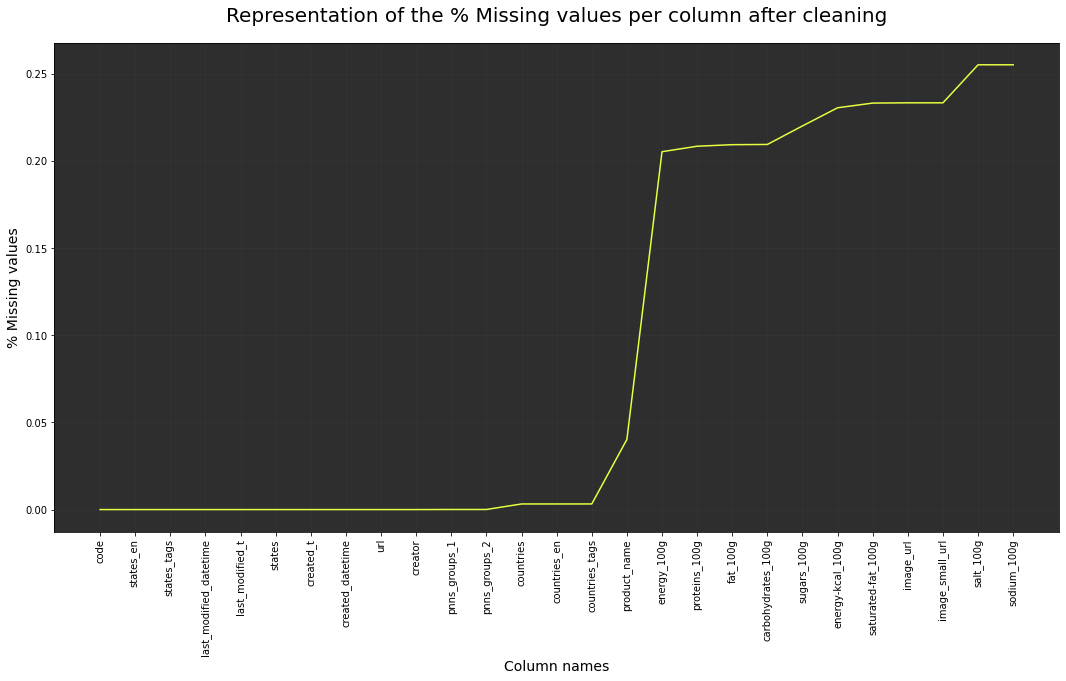

In [10]:
# data visualization for missing values of our dataframe called missing_data

to_plot = missing_data2.sort_values(by=['% Missing values'])
fig, ax = plt.subplots(figsize=(18, 9))
ax.set_facecolor("#2E2E2E")
plt.title('Representation of the % Missing values per column after cleaning', fontsize=20, y=1.03)
plt.xlabel('Column names', fontsize=14)
plt.ylabel('% Missing values', fontsize=14)
plt.grid(True, color="#93a1a1", alpha=0.05)
plt.xticks(rotation=90) # this line allow us to rotate the x_labels so they can be readable
plt.plot(to_plot['Column variable'],to_plot['% Missing values'],color="#E8FF41"); 

# Check for entire rows with NaN values

We notice that we don't have any rows in our dataframe that have missing values for each column.

In [11]:
miss_rows=data[data.isnull().all(axis=1)]

print('Number of rows with entire NaN values is:', len(miss_rows))



Number of rows with entire NaN values is: 0


# Treating Missing 'product_name' Values 

In our *missing_data2*, we notice that an important number of values is missing in the column named **product_name** and it seems complicated to define our application without the name of the product we're working with. 
We decide to drop the rows that have a missing value on the **product_name** column.  

In [12]:
drop_data = data.dropna(axis=0, how='any', subset=['product_name'], inplace=False)

missing_data3 = pd.DataFrame()
missing_data3['Column variable'] = drop_data.columns
missing_data3['Data type'] = list(drop_data.dtypes)
missing_data3['Missing values count'] = list(drop_data.isna().sum())
missing_data3['% Missing values'] = list(drop_data.isna().sum()/(len(drop_data))) 
print(missing_data3)

           Column variable Data type  Missing values count  % Missing values
0                     code    object                     0          0.000000
1                      url    object                     0          0.000000
2                  creator    object                     0          0.000000
3                created_t     int64                     0          0.000000
4         created_datetime    object                     0          0.000000
5          last_modified_t     int64                     0          0.000000
6   last_modified_datetime    object                     0          0.000000
7             product_name    object                     0          0.000000
8                countries    object                   449          0.002310
9           countries_tags    object                   450          0.002316
10            countries_en    object                   450          0.002316
11           pnns_groups_1    object                     0          0.000000

# Duplicated 'product_name' Values Observations

For us, this step is an observation to know how many duplicated values we can find in the column **product_name** so we know we can keep this information for later in case we need it. 

To do so, we're going to create two dataframes:
* Our dataframe **check** is going to return boolean values for each *product_name* to locate if the value got a duplicate in the same column. **True** if a duplicate value exist and **False** if not.
* The next step is about determining the number of duplicate values across the *product_name* column for each cell. In two steps, we firstly create a dataframe called **dups** that contain all the duplicated value from *product_name* in our **check** dataframe. Secondly, we create another dataframe named **count_dups** that we sort by **product_name** and by descending order, that is going to contain the count of duplicated value for each **product_name**.

In [13]:
check = pd.DataFrame(drop_data['product_name'].duplicated()) # return a dataframe of boolean containing the column product_name and a second column True or False
check = check.set_index(drop_data['product_name']).set_axis(['Duplicated count'], axis='columns') # change the index to the product name to know what products we are talking about
# returns True which means that there are product_name that are duplicated
check.head(10)

,Duplicated count
product_name,
2 côtes premières de porc,False
Mini white sourdough,False
La brandade de morue parmentière,False
Maślanka naturalna prosto z maselnicy,False
Pizza 3 fromages,False
Carciofini,False
Old tyme butterbread,False
Indian Tonic Sleek Cans 33CL 6-pack,False
Bouillie Poires Biscottées,False


In [14]:
dups = check[check['Duplicated count'] == True]
count_dups = dups.groupby(['product_name'], sort=True).count().sort_values(by=['Duplicated count'], axis=0, ascending=False)
print(count_dups)

                                   Duplicated count
product_name                                       
Miel                                            147
Aceite de oliva virgen extra                    129
Filet de poulet                                 123
Comté                                            95
Poulet                                           82
...                                             ...
Jambon cru Riserva Emilia Romagna                 1
Jambon blanc bio                                  1
Jambon bayonne                                    1
Jambon au torchon                                 1
เต้าหู้ไข่ไก่                                     1

[12713 rows x 1 columns]


# Entire NaN Rows for Quantitative Variables

A step further in our row cleaning, we want to delete the rows that contain only NaN values on the quantitative variables because we won't make much of an application with no quantitative values. 
To do so, we proceed with two dataframes again:
* First, we create a dataframe called **mask** and using the operations *.loc* to locate the columns that interest us, *.isnull()* to target only the missing values on those columns and *.sum()* with the condition that NaN values appear on respectively all our columns, we gather all the rows with missing values on the quantitative variables into it. 
* Then, we create our last clean dataframe called **drop_data_nan** that is a combination of **drop_data** - our original dataframe with the clean columns - and **mask** using the *.append()* operation. Using *.drop_duplicates()* and keeping the option *keep=False* we delete all the duplicates values, which allows us to delete all the rows with NaN that we previously gathered in our **mask** dataframe because they obviously are contained in **drop_data** as well.  

In [15]:
mask = drop_data[drop_data.loc[:,['energy-kcal_100g','energy_100g','fat_100g','saturated-fat_100g','carbohydrates_100g','sugars_100g','proteins_100g','salt_100g','sodium_100g']].isnull().sum(axis=1) == 9]
# mask contains all the rows with NaN values on the quantitative variables

In [16]:
drop_data_nan = drop_data.append(mask).drop_duplicates(keep=False)
drop_data_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163912 entries, 2002675 to 514255
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   code                    163912 non-null  object 
 1   url                     163912 non-null  object 
 2   creator                 163912 non-null  object 
 3   created_t               163912 non-null  int64  
 4   created_datetime        163912 non-null  object 
 5   last_modified_t         163912 non-null  int64  
 6   last_modified_datetime  163912 non-null  object 
 7   product_name            163912 non-null  object 
 8   countries               163655 non-null  object 
 9   countries_tags          163655 non-null  object 
 10  countries_en            163655 non-null  object 
 11  pnns_groups_1           163912 non-null  object 
 12  pnns_groups_2           163912 non-null  object 
 13  states                  163912 non-null  object 
 14  states_tags   

# Filtered Variables Observations

Now, we have a better dataset to make our first explorations.
We're going to start by working on the quantitative columns that make the most sense in order to draw conclusions for our application, as well as adding the categorical columns that make the most sense to describe our dataset.
Here are the columns we're going to work on:

*Categorical values*

* **product_name**
* **countries**
* **states**

*Quantitative values*

* **energy-kcal_100g**
* **energy_100g**  
* **fat_100g** 
* **saturated-fat_100g** 
* **carbohydrates_100g**   
* **sugars_100g**  
* **proteins_100g**   
* **salt_100g**  
* **sodium_100g**  

In [17]:
# define the quantitative and categorical variables that are relevant sorted in a new dataframe

dataset = pd.DataFrame()
dataset['Product Name'] = drop_data_nan['product_name']
dataset['Countries'] = drop_data_nan['countries']
dataset['States'] = drop_data_nan['states']
dataset['Energy Kcal per 100g'] = drop_data_nan['energy-kcal_100g']
dataset['Energy per 100g'] = drop_data_nan['energy_100g']
dataset['Fat per 100g'] = drop_data_nan['fat_100g']
dataset['Saturated fat per 100g'] = drop_data_nan['saturated-fat_100g']
dataset['Carbohydrates per 100g'] = drop_data_nan['carbohydrates_100g']
dataset['Sugars per 100g'] = drop_data_nan['sugars_100g']
dataset['Proteins per 100g'] = drop_data_nan['proteins_100g']
dataset['Salt per 100g'] = drop_data_nan['salt_100g']
dataset['Sodium per 100g'] = drop_data_nan['sodium_100g']

dataset.head(10)

,Product Name,Countries,States,Energy Kcal per 100g,Energy per 100g,Fat per 100g,Saturated fat per 100g,Carbohydrates per 100g,Sugars per 100g,Proteins per 100g,Salt per 100g,Sodium per 100g
2002675,Mini white sourdough,en:au,"en:to-be-completed, en:nutrition-facts-complet...",229.684509,961.0,0.800000,0.2,45.400002,2.100000,8.200000,1.000000,0.400000
305505,La brandade de morue parmentière,France,"en:to-be-completed, en:nutrition-facts-complet...",156.000000,653.0,9.600000,0.9,10.100000,0.300000,7.200000,0.800000,0.320000
1456492,Maślanka naturalna prosto z maselnicy,Polska,"en:to-be-checked, en:complete, en:nutrition-fa...",38.000000,159.0,1.000000,0.6,4.200000,4.200000,3.000000,0.100000,0.040000
1026064,Pizza 3 fromages,France,"en:to-be-completed, en:nutrition-facts-complet...",225.000000,941.0,7.300000,4.2,28.900000,2.000000,9.900000,1.400000,0.560000
1692129,Carciofini,en:it,"en:to-be-completed, en:nutrition-facts-complet...",101.000000,423.0,7.800000,0.8,3.900000,1.400000,1.900000,1.800000,0.720000
205182,Old tyme butterbread,United States,"en:to-be-completed, en:nutrition-facts-complet...",290.322581,1215.0,3.225806,0.0,54.838710,3.225806,9.677419,1.129032,0.451613
1402858,Indian Tonic Sleek Cans 33CL 6-pack,"France, en:belgium","en:to-be-completed, en:nutrition-facts-complet...",37.000000,155.0,0.000000,0.0,9.000000,9.000000,0.000000,NaN,NaN
1534793,Bouillie Poires Biscottées,Suisse,"en:to-be-completed, en:nutrition-facts-complet...",NaN,1824.0,11.200000,4.8,67.100000,33.300000,13.700000,0.230000,0.092000
1605026,Tortine integrali senza zucchero,Italy,"en:to-be-completed, en:nutrition-facts-complet...",417.000000,1740.0,22.200000,11.1,47.200000,0.000000,5.560000,0.556000,0.222000
464650,Sparkling juice,en:us,"en:to-be-completed, en:nutrition-facts-complet...",16.949153,71.0,0.000000,0.0,4.237288,2.259887,0.282486,NaN,NaN


# Univariate Analysis for Quantitative Values

We're doing some univariate analysis on the quantitative variables contained in our *dataset* dataframe.
Our analysis will include a graph using matplot and seaborn libraries for each variable.

For convenience, we applied some adjustments.

In the boxplot distribution, we have limited the **x axis** depending on the concentration of the values to have a readable graph for each variable.
This distribution allows us to notice the outliers over Q4 for each variable which will be useful for out next step.

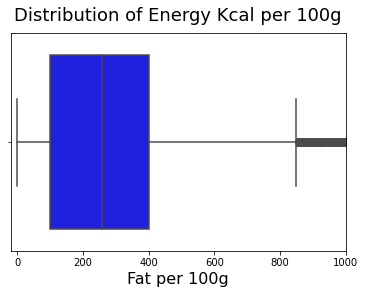

In [18]:
# Univariate Analysis of Energy Kcal per 100g

#Distribution using boxplot

sns.boxplot(dataset['Energy Kcal per 100g'],color="blue")
plt.xlabel("Fat per 100g", size=16)
plt.title("Distribution of Energy Kcal per 100g", size=18, y=1.03)
plt.xlim([-20, 1000])
plt.show()

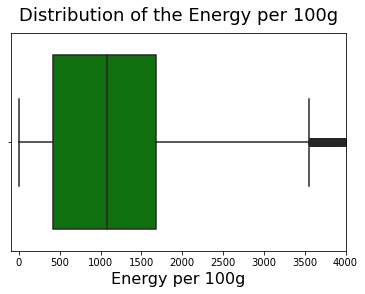

In [19]:
# Univariate Analysis of Energy per 100g

#Distribution using boxplot

sns.boxplot(dataset['Energy per 100g'],color="green")
plt.xlabel("Energy per 100g", size=16)
plt.title("Distribution of the Energy per 100g", size=18, y=1.03)
plt.xlim([-100, 4000])
plt.show()

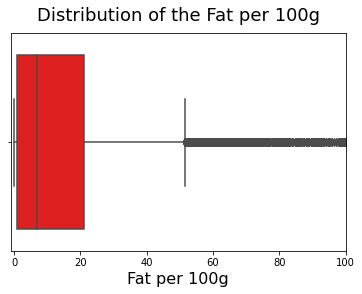

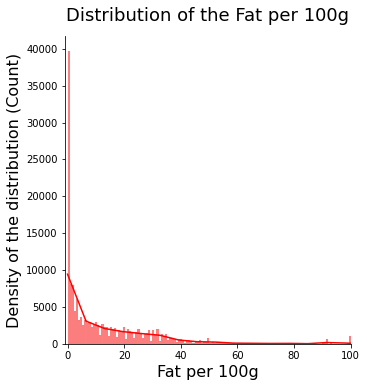

In [20]:
# Univariate Analysis of Fat per 100g

#Distribution using boxplot

sns.boxplot(dataset['Fat per 100g'],color="red")
plt.xlabel("Fat per 100g", size=16)
plt.title("Distribution of the Fat per 100g", size=18, y=1.03)
plt.xlim([-1, 100])
plt.show()

#Distribution using displot

sns.displot(dataset['Fat per 100g'].sort_values(ascending=True), kde=True, color="red")
plt.title("Distribution of the Fat per 100g", size=18, y=1.03)
plt.ylabel("Density of the distribution (Count)", size=16)
plt.xlabel("Fat per 100g", size=16)
plt.xlim([-1, 100])
plt.show()

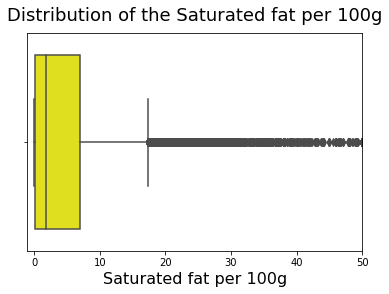

In [21]:
# Univariate Analysis of Saturated fat per 100g

#Distribution using boxplot

sns.boxplot(dataset['Saturated fat per 100g'],color="yellow")
plt.xlabel("Saturated fat per 100g", size=16)
plt.title("Distribution of the Saturated fat per 100g", size=18, y=1.03)
plt.xlim([-1, 50])
plt.show()

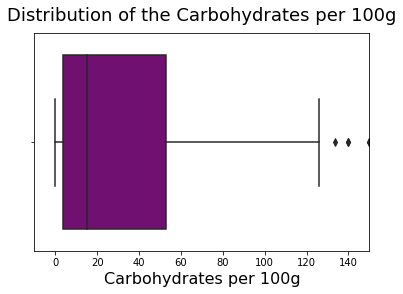

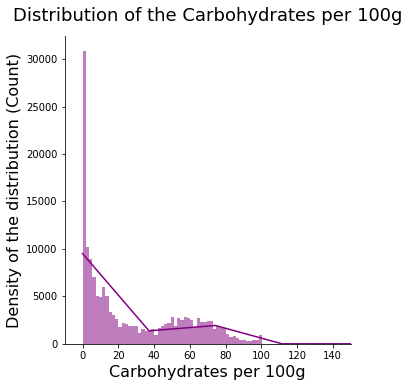

In [22]:
# Univariate Analysis of Carbohydrates per 100g

#Distribution using boxplot

sns.boxplot(dataset['Carbohydrates per 100g'],color="purple")
plt.xlabel("Carbohydrates per 100g", size=16)
plt.title("Distribution of the Carbohydrates per 100g", size=18, y=1.03)
plt.xlim([-10, 150])
plt.show()

#Distribution using displot

sns.displot(dataset['Carbohydrates per 100g'].sort_values(ascending=True), kde=True, color="purple")
plt.title("Distribution of the Carbohydrates per 100g", size=18, y=1.03)
plt.ylabel("Density of the distribution (Count)", size=16)
plt.xlabel("Carbohydrates per 100g", size=16)
plt.xlim([-10, 150])
plt.show()

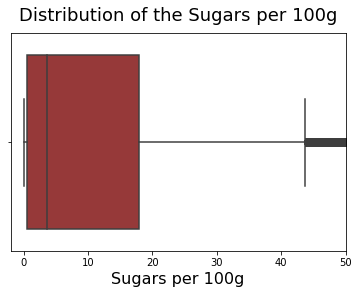

In [23]:
# Univariate Analysis of Sugars per 100g

#Distribution using boxplot

sns.boxplot(dataset['Sugars per 100g'],color="brown")
plt.xlabel("Sugars per 100g", size=16)
plt.title("Distribution of the Sugars per 100g", size=18, y=1.03)
plt.xlim([-2, 50])
plt.show()

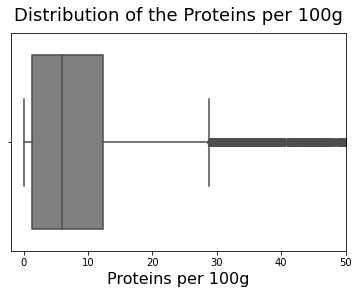

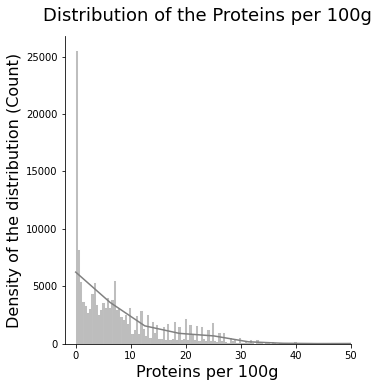

In [24]:
# Univariate Analysis of Proteins per 100g

#Distribution using boxplot

sns.boxplot(dataset['Proteins per 100g'],color="gray")
plt.xlabel("Proteins per 100g", size=16)
plt.title("Distribution of the Proteins per 100g", size=18, y=1.03)
plt.xlim([-2, 50])
plt.show()

#Distribution using displot

sns.displot(dataset['Proteins per 100g'].sort_values(ascending=True), kde=True, color="gray")
plt.title("Distribution of the Proteins per 100g", size=18, y=1.03)
plt.ylabel("Density of the distribution (Count)", size=16)
plt.xlabel("Proteins per 100g", size=16)
plt.xlim([-2, 50])
plt.show()

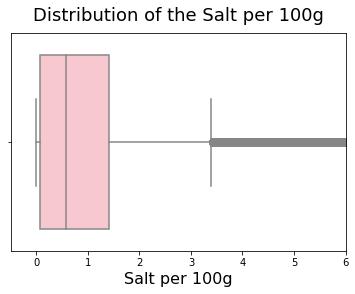

In [25]:
# Univariate Analysis of Salt per 100g

#Distribution using boxplot

sns.boxplot(dataset['Salt per 100g'],color="pink")
plt.xlabel("Salt per 100g", size=16)
plt.title("Distribution of the Salt per 100g", size=18, y=1.03)
plt.xlim([-0.5, 6])
plt.show()

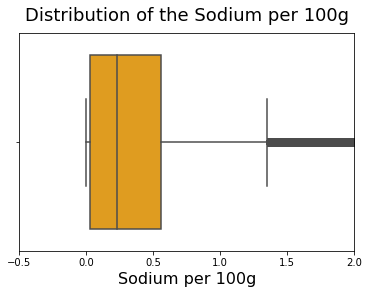

In [26]:
# Univariate Analysis of Sodium per 100g

#Distribution using boxplot

sns.boxplot(dataset['Sodium per 100g'],color="orange")
plt.xlabel("Sodium per 100g", size=16)
plt.title("Distribution of the Sodium per 100g", size=18, y=1.03)
plt.xlim([-0.5, 2])
plt.show()

# Univariate Analysis for Categorical Values

We create a dataframe called *count_countries* that return the countries as the index and the count of products as a column.
In order to clarify our graph for our analysis on the countries, we  decide to drop all the countries variable using a boolean condition below 200 count values. It allows us to keep enough countries to make our observations while having a readable graph (45 countries).
We use **matplotlib** to display the results. 

Then, we create a **countplot()** to observe the count of products per country. 

In [27]:
count_countries = pd.DataFrame(dataset['Countries'].value_counts().rename_axis(axis=0, index='Countries')).set_axis(["Count"], axis='columns')
count_countries.describe()

,Count
count,2474.000000
mean,66.149960
std,1076.051452
min,1.000000
25%,1.000000
50%,1.000000
75%,4.000000
max,37224.000000


In [28]:
new_cc = count_countries.query("Count >= 200")
new_cc.head()

,Count
Countries,
France,37224
United States,30731
en:fr,15910
en:es,9166
en:it,8737


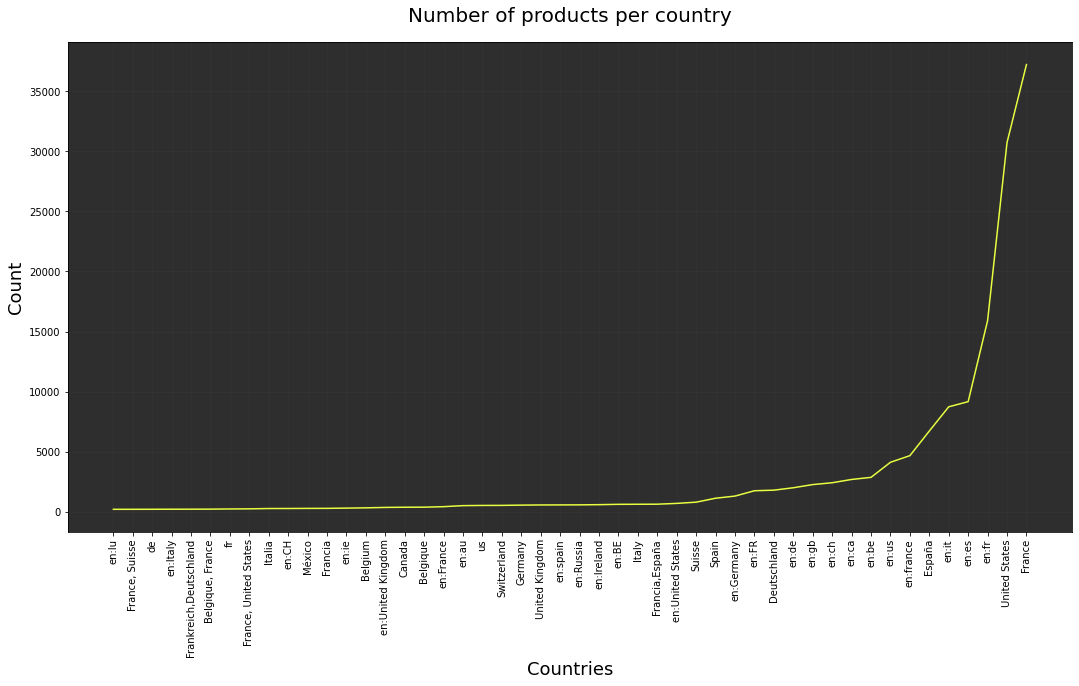

In [29]:
to_plot = new_cc.sort_values(by=['Count'])
fig, ax = plt.subplots(figsize=(18, 9))
ax.set_facecolor("#2E2E2E")
plt.title('Number of products per country', fontsize=20, y=1.03)
plt.xlabel('Countries', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.grid(True, color="#93a1a1", alpha=0.05)
plt.xticks(rotation=90) # this line allow us to rotate the x_labels so they can be readable
plt.plot(to_plot.index.values,to_plot['Count'],color="#E8FF41"); 


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 [Text(0, 0, 'France'),
  Text(1, 0, 'United States'),
  Text(2, 0, 'en:fr'),
  Text(3, 0, 'en:es'),
  Text(4, 0, 'en:it'),
  Text(5, 0, 'España'),
  Text(6, 0, 'en:france'),
  Text(7, 0, 'en:us'),
  Text(8, 0, 'en:be'),
  Text(9, 0, 'en:ca'),
  Text(10, 0, 'en:ch'),
  Text(11, 0, 'en:gb'),
  Text(12, 0, 'en:de'),
  Text(13, 0, 'Deutschland'),
  Text(14, 0, 'en:FR'),
  Text(15, 0, 'en:Germany'),
  Text(16, 0, 'Spain'),
  Text(17, 0, 'Suisse'),
  Text(18, 0, 'en:United States'),
  Text(19, 0, 'Francia,España'),
  Text(20, 0, 'Italy'),
  Text(21, 0, 'en:BE'),
  Text(22, 0, 'en:Ireland'),
  Text(23, 0, 'en:Russia'),
  Text(24, 0, 'en:spain'),
  Text(25, 0, 'United Kingdom'),
  Text(26, 0, 'Germany'),
  Text(27, 0, 'Switzerland'),
  Text(28, 0, 'us'),
  Text(29, 0, 'en:au'),


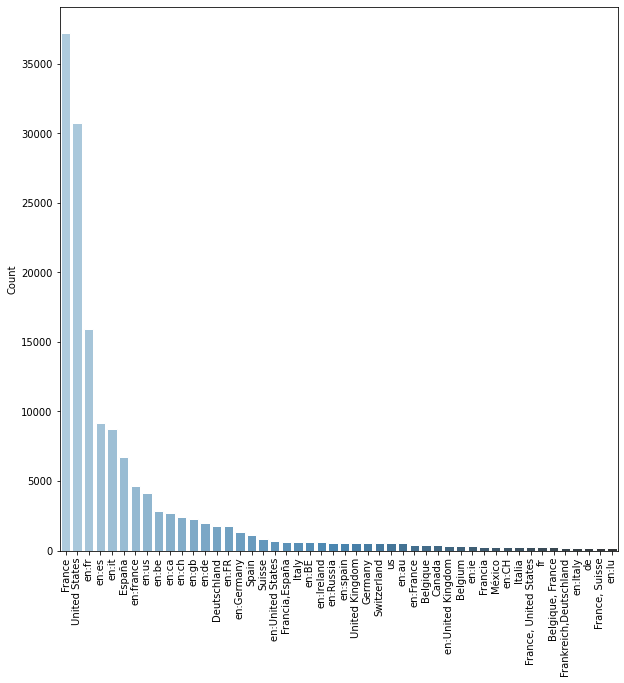

In [30]:
# We do a barplot displaying the distribution of the number of products per country
fig, ax = plt.subplots(figsize=(10, 10))
sns.set_style('darkgrid')
sns.barplot(x=new_cc.index.values, y=new_cc["Count"], palette="Blues_d")
plt.xticks(rotation=90)

# Removing the Outliers on Quantitative Variables

As explaines previously, the boxplot graphs allowed us to visually determine the outliers - they are the ones that we can see after the Q4 bar on the diagrams.
Now, we're going to remove these extreme values called outliers to purify our data using the interquartile range method. 

To do so, we create a function called *remove_outlier_IQR* that is going to calculate the Q1 and Q3 of the dataframe we call, then calculate the IQR, and return a new dataframe with the outlier values removed. 

By using *dataset_out.describe()*, we clearly notice the difference in the **max** values with *dataset.describe()*. We also notice an adjustment in the **mean()**.



In [31]:
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final


dataset_out = pd.DataFrame(remove_outlier_IQR(dataset))
dataset_out.describe()

,Energy Kcal per 100g,Energy per 100g,Fat per 100g,Saturated fat per 100g,Carbohydrates per 100g,Sugars per 100g,Proteins per 100g,Salt per 100g,Sodium per 100g
count,153316.000000,158265.000000,153451.000000,142440.000000,159204.00000,141279.000000,154375.000000,140720.000000,140721.000000
mean,265.441509,1108.503591,11.265039,3.393394,28.12808,7.763082,7.551913,0.721173,0.288472
std,184.214917,769.767252,12.578593,4.409956,27.99736,10.689892,7.344278,0.774651,0.309870
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,100.000000,418.000000,0.600000,0.100000,3.53000,0.500000,1.200000,0.050000,0.020000
50%,255.857000,1063.000000,6.140351,1.400000,15.30000,2.900000,5.700000,0.475000,0.190000
75%,397.000000,1657.000000,19.000000,5.100000,53.00000,10.700000,11.430000,1.200000,0.480000
max,850.000000,3556.000000,51.460000,17.333333,126.00000,43.750000,28.800000,3.382500,1.353000


# Remove Outliers on Categorical Column "Countries"

We remove the outliers from **Countries** column on the *new_cc* dataframe we previously clean and we call it *dataframe_cc*.
Then, we merge our *dataframe_cc* (categorical values) with *dataset_out* (quantitative values) by removing the countries variables that are found in *dataset_out* but not founf in our *dataframe_cc* in which we did the cleaning. 

It gives us a clean dataset that we finally call **dataset_clean** and on which we're going to create bivariate and multivariate analysis between categorical columns and quantitative columns.

In [32]:
dataset_cc = pd.DataFrame(remove_outlier_IQR(new_cc))
dataset_cc.describe()

,Count
count,42.000000
mean,948.761905
std,1069.672227
min,205.000000
25%,282.000000
50%,543.000000
75%,1046.000000
max,4671.000000


In [33]:
# remove the countries we don't need from our univariate analysis on Countries column
dataset_clean = pd.merge(dataset_out, dataset_cc, on=["Countries"], how="inner", indicator=True)
del dataset_clean['Count'] # delete useless row during the merge operation
del dataset_clean['_merge'] # delete useless row during the merge operation
dataset_clean.head(20)

,Product Name,Countries,States,Energy Kcal per 100g,Energy per 100g,Fat per 100g,Saturated fat per 100g,Carbohydrates per 100g,Sugars per 100g,Proteins per 100g,Salt per 100g,Sodium per 100g
0,Mini white sourdough,en:au,"en:to-be-completed, en:nutrition-facts-complet...",229.684509,961.0,0.800000,0.200000,45.400002,2.100000,8.200000,1.000000,0.400000
1,Vegan protein Chocolate Flavour,en:au,"en:to-be-completed, en:nutrition-facts-complet...",396.749525,1660.0,3.250000,1.500000,6.500000,0.250000,NaN,1.137500,0.455000
2,Fruity rings,en:au,"en:to-be-completed, en:nutrition-facts-complet...",400.000000,1674.0,1.666700,0.333300,85.000000,23.000000,6.666700,0.741667,0.296667
3,Kirks lemon squash,en:au,"en:to-be-completed, en:nutrition-facts-complet...",43.000000,180.0,0.100000,0.010000,10.800000,10.400000,0.100000,NaN,NaN
4,All Natural Supergrain Teriyaki Chicken,en:au,"en:to-be-completed, en:nutrition-facts-complet...",93.021032,389.0,3.200000,0.720000,13.400000,4.000000,3.200000,0.890000,0.356000
5,zuccini fritter,en:au,"en:to-be-completed, en:nutrition-facts-complet...",252.000000,1054.0,15.200000,7.200000,16.000000,4.000000,8.400000,1.250000,0.500000
6,"Live sparkling water, pure",en:au,"en:to-be-completed, en:nutrition-facts-complet...",0.701100,3.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Goat milk infant formula,en:au,"en:to-be-completed, en:nutrition-facts-complet...",NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN
8,Red grape juice,en:au,"en:to-be-completed, en:nutrition-facts-complet...",65.678780,275.0,0.000000,0.000000,15.200000,15.200000,0.000000,NaN,NaN
9,Woolworths classic mashed potato,en:au,"en:to-be-completed, en:nutrition-facts-complet...",103.389831,433.0,5.593220,3.898305,10.338983,1.525424,2.033898,0.406780,0.162712


# New Data Visualization

Once we used the interquartile range, we're using our *dataset_out* dataframe (without outliers) to display our data in two different ways:
* Boxplot distribution using **.boxplot()**
* Displot distribution using **.displot()**

Note that for the displot distribution, we used **KDE** parameters which stands for Kernel Density Estimate and shows us the estimate density curve based on KDE equation. 



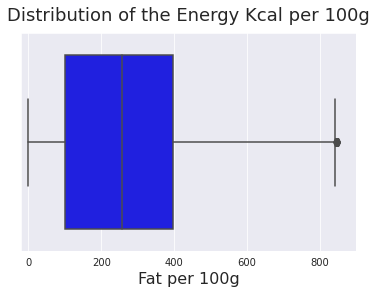

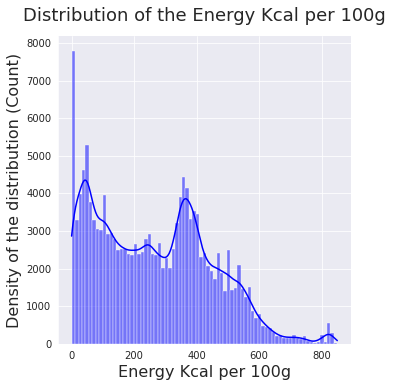

In [34]:
# Univariate Analysis of Energy Kcal per 100g (without outliers)

#Distribution using boxplot

sns.boxplot(dataset_out['Energy Kcal per 100g'],color="blue")
plt.xlabel("Fat per 100g", size=16)
plt.title("Distribution of the Energy Kcal per 100g", size=18, y=1.03)
plt.xlim([-20,900])
plt.show()

#Distribution using displot

sns.displot(dataset_out['Energy Kcal per 100g'].sort_values(ascending=True), kde=True, color="blue")
plt.title("Distribution of the Energy Kcal per 100g", size=18, y=1.03)
plt.ylabel("Density of the distribution (Count)", size=16)
plt.xlabel("Energy Kcal per 100g", size=16)
plt.show()

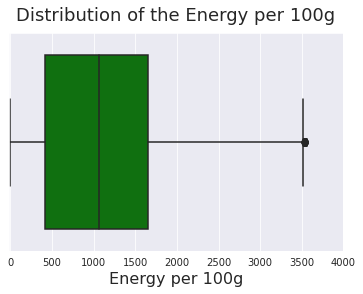

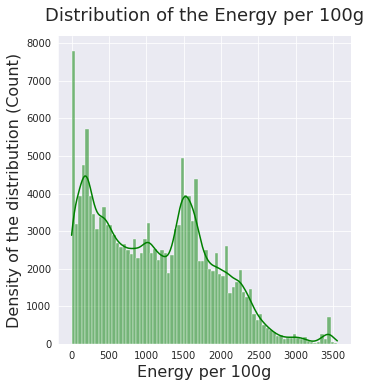

In [35]:
# Univariate Analysis of Energy per 100g (without outliers)

#Distribution using boxplot

sns.boxplot(dataset_out['Energy per 100g'],color="green")
plt.xlabel("Energy per 100g", size=16)
plt.title("Distribution of the Energy per 100g", size=18, y=1.03)
plt.xlim([-20, 4000])
plt.show()

#Distribution using displot

sns.displot(dataset_out['Energy per 100g'].sort_values(ascending=True), kde=True, color="green")
plt.title("Distribution of the Energy per 100g", size=18, y=1.03)
plt.ylabel("Density of the distribution (Count)", size=16)
plt.xlabel("Energy per 100g", size=16)
plt.show()

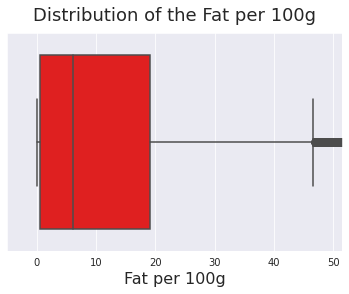

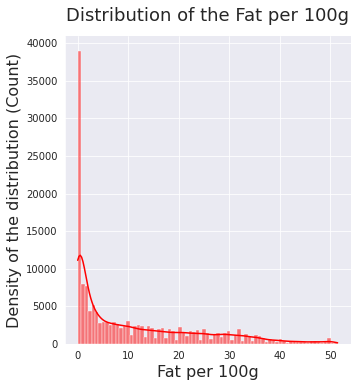

In [36]:
# Univariate Analysis of Fat per 100g (without outliers)

#Distribution using boxplot

sns.boxplot(dataset_out['Fat per 100g'],color="red")
plt.xlabel("Fat per 100g", size=16)
plt.title("Distribution of the Fat per 100g", size=18, y=1.03)
plt.xlim([-5, max(dataset_out['Fat per 100g'])])
plt.show()

#Distribution using displot

sns.displot(dataset_out['Fat per 100g'].sort_values(ascending=True), kde=True, color="red")
plt.title("Distribution of the Fat per 100g", size=18, y=1.03)
plt.ylabel("Density of the distribution (Count)", size=16)
plt.xlabel("Fat per 100g", size=16)
plt.show()

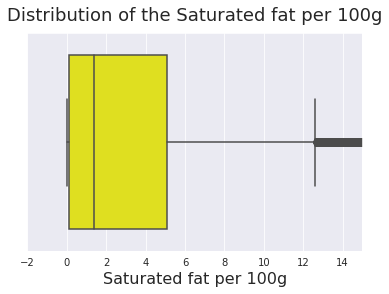

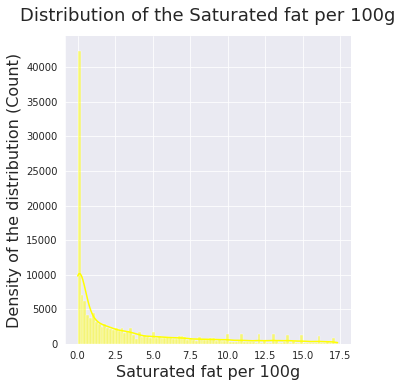

In [37]:
# Univariate Analysis of Saturated fat per 100g (without outliers)

#Distribution using boxplot

sns.boxplot(dataset_out['Saturated fat per 100g'],color="yellow")
plt.xlabel("Saturated fat per 100g", size=16)
plt.title("Distribution of the Saturated fat per 100g", size=18, y=1.03)
plt.xlim([-2, 15])
plt.show()

#Distribution using displot

sns.displot(dataset_out['Saturated fat per 100g'].sort_values(ascending=True), kde=True, color="yellow")
plt.title("Distribution of the Saturated fat per 100g", size=18, y=1.03)
plt.ylabel("Density of the distribution (Count)", size=16)
plt.xlabel("Saturated fat per 100g", size=16)
plt.show()

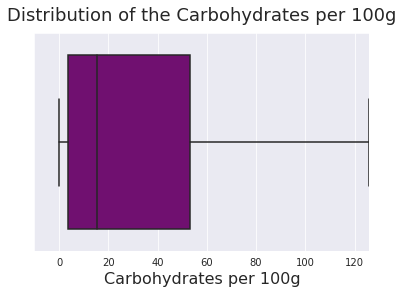

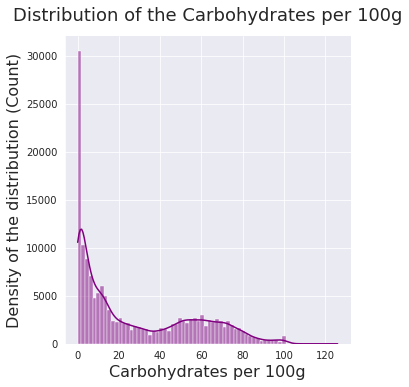

In [38]:
# Univariate Analysis of Carbohydrates per 100g (without outliers)

#Distribution using boxplot

sns.boxplot(dataset_out['Carbohydrates per 100g'],color="purple")
plt.xlabel("Carbohydrates per 100g", size=16)
plt.title("Distribution of the Carbohydrates per 100g", size=18, y=1.03)
plt.xlim([-10, max(dataset_out['Carbohydrates per 100g'])])
plt.show()

#Distribution using displot

sns.displot(dataset_out['Carbohydrates per 100g'].sort_values(ascending=True), kde=True, color="purple")
plt.title("Distribution of the Carbohydrates per 100g", size=18, y=1.03)
plt.ylabel("Density of the distribution (Count)", size=16)
plt.xlabel("Carbohydrates per 100g", size=16)
plt.show()

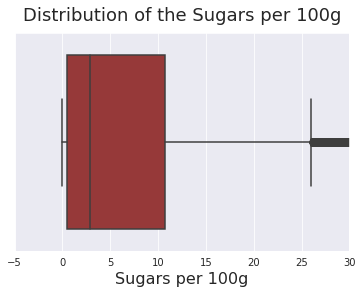

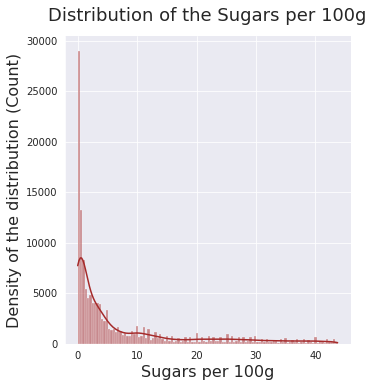

In [39]:
# Univariate Analysis of Sugars per 100g (without outliers)

#Distribution using boxplot

sns.boxplot(dataset_out['Sugars per 100g'],color="brown")
plt.xlabel("Sugars per 100g", size=16)
plt.title("Distribution of the Sugars per 100g", size=18, y=1.03)
plt.xlim([-5, 30])
plt.show()

#Distribution using displot

sns.displot(dataset_out['Sugars per 100g'].sort_values(ascending=True), kde=True, color="brown")
plt.title("Distribution of the Sugars per 100g", size=18, y=1.03)
plt.ylabel("Density of the distribution (Count)", size=16)
plt.xlabel("Sugars per 100g", size=16)
plt.show()

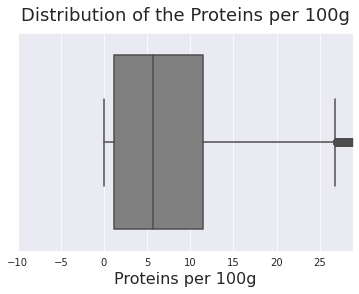

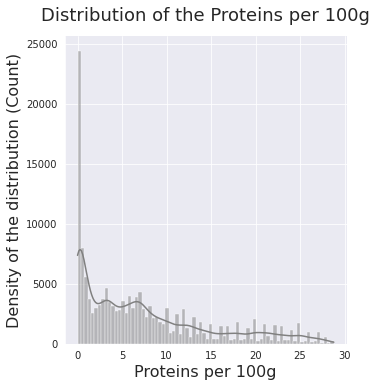

In [40]:
# Univariate Analysis of Proteins per 100g (without outliers)

#Distribution using boxplot

sns.boxplot(dataset_out['Proteins per 100g'],color="gray")
plt.xlabel("Proteins per 100g", size=16)
plt.title("Distribution of the Proteins per 100g", size=18, y=1.03)
plt.xlim([-10, max(dataset_out['Proteins per 100g'])])
plt.show()

#Distribution using displot

sns.displot(dataset_out['Proteins per 100g'].sort_values(ascending=True), kde=True, color="gray")
plt.title("Distribution of the Proteins per 100g", size=18, y=1.03)
plt.ylabel("Density of the distribution (Count)", size=16)
plt.xlabel("Proteins per 100g", size=16)
plt.show()

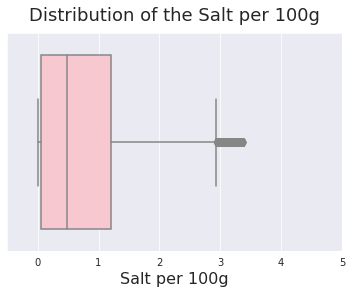

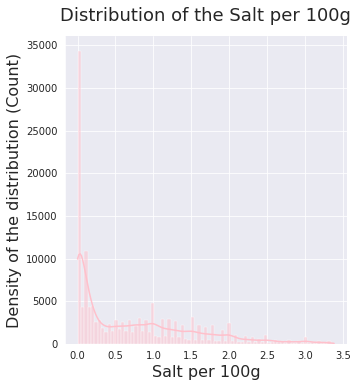

In [41]:
# Univariate Analysis of Salt per 100g (without outliers)

#Distribution using boxplot

sns.boxplot(dataset_out['Salt per 100g'],color="pink")
plt.xlabel("Salt per 100g", size=16)
plt.title("Distribution of the Salt per 100g", size=18, y=1.03)
plt.xlim([-0.5,5])
plt.show()

#Distribution using displot
sns.displot(dataset_out['Salt per 100g'].sort_values(ascending=True), kde=True, color="pink")
plt.title("Distribution of the Salt per 100g", size=18, y=1.03)
plt.ylabel("Density of the distribution (Count)", size=16)
plt.xlabel("Salt per 100g", size=16)
plt.show()

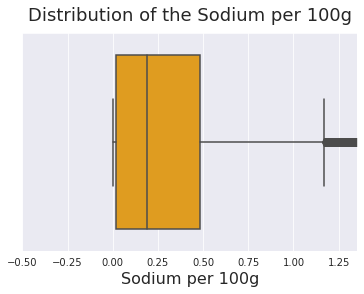

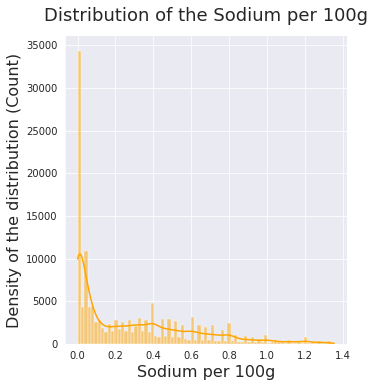

In [42]:
# Univariate Analysis of Sodium per 100g (without outliers)

#Distribution using boxplot

sns.boxplot(dataset_out['Sodium per 100g'],color="orange")
plt.xlabel("Sodium per 100g", size=16)
plt.title("Distribution of the Sodium per 100g", size=18, y=1.03)
plt.xlim([-0.5, max(dataset_out['Sodium per 100g'])])
plt.show()

#Distribution using displot
sns.displot(dataset_out['Sodium per 100g'].sort_values(ascending=True), kde=True, color="orange")
plt.title("Distribution of the Sodium per 100g", size=18, y=1.03)
plt.ylabel("Density of the distribution (Count)", size=16)
plt.xlabel("Sodium per 100g", size=16)
plt.show()

# Bivariate Analysis 

Our bivariate analysis will help us to focus on the important data for our application.
The goal is to provide insights and product recommendations for people doing a ketogenic diet based on their locations (per country).

The ketogenic or “keto” diet is a low-carbohydrate, fat-rich eating plan that has been used for centuries to treat specific medical conditions. In the 19th century, the ketogenic diet was commonly used to help control diabetes.

For 2000 calories consumed per day, a ketogenic diet is generally made of:
- Carbohydrates: 20 to 50 grams per day
- Fat: 150 to 170 grams per day
- Proteins: 60 to 80 grams per day

Source: https://www.hsph.harvard.edu/nutritionsource/healthy-weight/diet-reviews/ketogenic-diet/


We're going to study the following pairs of variables by doing a **pairplot()** and by doing a multivariate analysis with the variables (Fat, Proteins, Carbohydrates):
- Carbohydrates/Fat
- Carbohydrates/Proteins
- Proteins/Fat

After that we'll cross the results with the countries where we can find our product recommendations so people can use it in any countries!



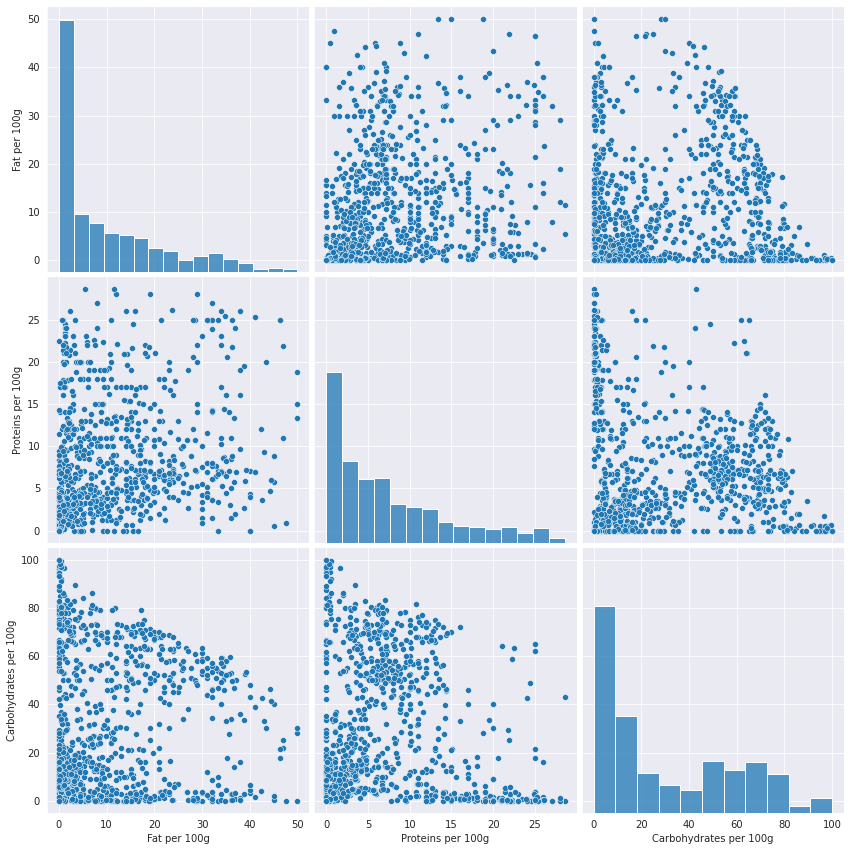

In [43]:
# we reduce the number of variable of our dataset_clean to fit our application needs
# we use .dropna() function of our library to have practical data for our application
dataset_app = dataset_clean[['Product Name','Countries','Fat per 100g','Proteins per 100g','Carbohydrates per 100g']].dropna()
sns.pairplot(dataset_app.sample(1000),size=4)

In [44]:
dataset_app.head()

,Product Name,Countries,Fat per 100g,Proteins per 100g,Carbohydrates per 100g
0,Mini white sourdough,en:au,0.8000,8.2000,45.400002
2,Fruity rings,en:au,1.6667,6.6667,85.000000
3,Kirks lemon squash,en:au,0.1000,0.1000,10.800000
4,All Natural Supergrain Teriyaki Chicken,en:au,3.2000,3.2000,13.400000
5,zuccini fritter,en:au,15.2000,8.4000,16.000000


# Correlation Matrix

We create the correlation matrix of our final dataset using the Pearson method on the numerical variables. 

In [45]:
dataset_app.corr(method ='pearson')

,Fat per 100g,Proteins per 100g,Carbohydrates per 100g
Fat per 100g,1.000000,0.393307,0.013234
Proteins per 100g,0.393307,1.000000,-0.184786
Carbohydrates per 100g,0.013234,-0.184786,1.000000


# Application

Our application called **Ketodapp** allows the users to add their groceries on a list in the app which show them the addition of fat, proteins and carbohydrates in their grocery list so they know if they exceed their weekly consumption in their keto diet. 
They will use Ketodapp to plan their daily, weekly, monthly groceries. We can even think about adding QR code for each product so they can use it while doing their groceries to see if they exceed the authorized fat, proteins and carbs or if they still have space left to buy more products. 

When creating an account on the application, we can have the users setting the parameters they want for their keto diet and input the correct amount of fat, proteins and carbs per day, week and month that they desire to respect.

# Prepare for Modeling

Our cleaning and exploration steps are done, we export our dataset as a csv to work on our predictions and modeling


In [46]:
import os
os.chdir(r'./')
dataset_app.to_csv('ketodapp.csv',sep = '\t',index = True)

In [47]:
from IPython.display import FileLink
FileLink(r'ketodapp.csv')


/kaggle/working/ketodapp.csv